In [4]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

# Bai tap 1
df = pd.read_csv('cleveland.csv', header=None)
df.columns = ['age', 'sex', 'cp', 'trestbps', 'chol',
              'fbs', 'restecg', 'thalach', 'exang',
              'oldpeak', 'slope', 'ca', 'thal', 'target']

df['target'] = df.target.map({0: 0, 1: 1, 2: 1, 3: 1, 4: 1})
df['thal'] = df.thal.fillna(df.thal.mean())
df['ca'] = df.ca.fillna(df.ca.mean())

Bai tap 1

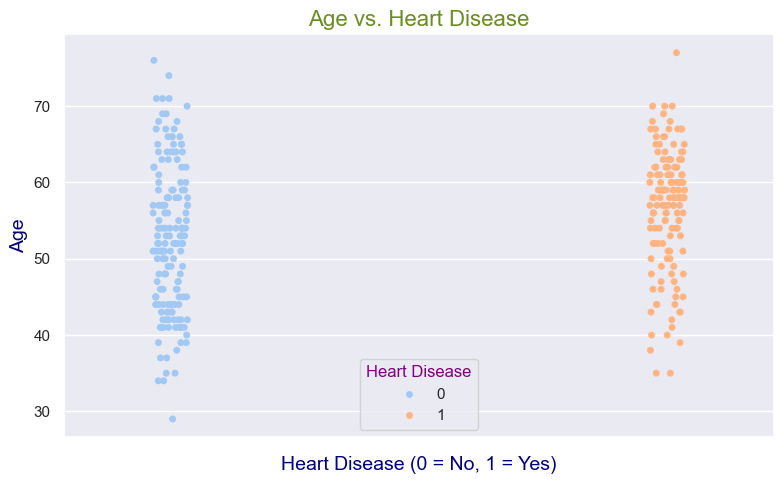

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme()
plt.figure(figsize=(8, 5))
sns.stripplot(x='target', y='age', data=df, hue='target',
              jitter=True, palette='pastel', dodge=True)
plt.title('Age vs. Heart Disease', fontsize=16, color='olivedrab')
plt.xlabel('Heart Disease (0 = No, 1 = Yes)', fontsize=14, color='navy')
plt.ylabel('Age', fontsize=14, color='navy')
plt.xticks(ticks=[0, 1], labels=['', ''])
legend = plt.legend(title='Heart Disease', loc='lower center')
plt.setp(legend.get_title(), color='purple')
plt.tight_layout()
plt.show()

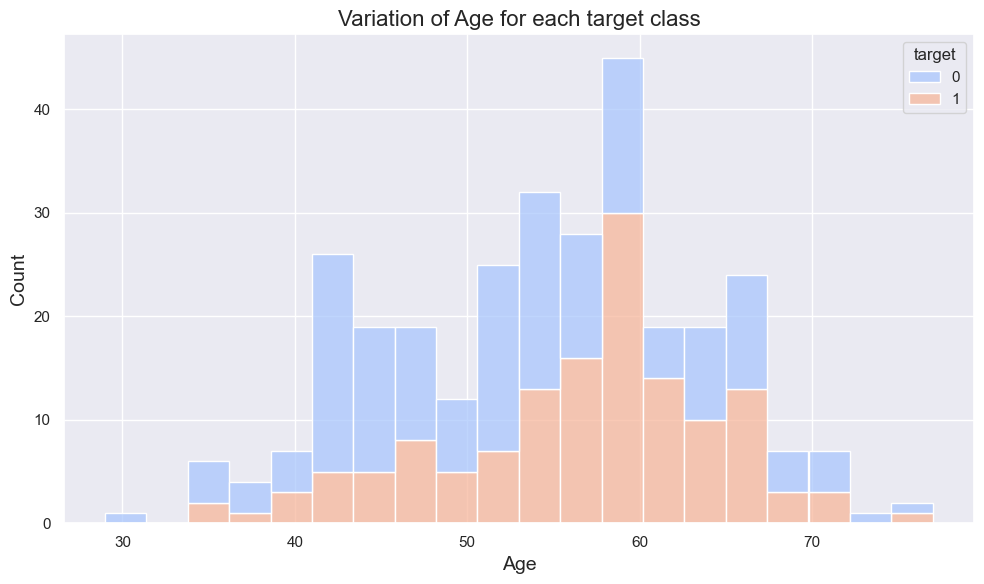

In [44]:
# Set the theme for seaborn plots
sns.set_theme()

# Create the histogram
plt.figure(figsize=(10, 6))

# Histogram to show the distribution of age with target as hue
sns.histplot(data=df, x='age', hue='target',
             multiple='stack', palette='coolwarm', bins=20)

# Add labels and title to the plot
plt.title('Variation of Age for each target class', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Show the plot
plt.tight_layout()
plt.show()

Bai tap 2

C:\Users\dphng\AppData\Local\Temp\ipykernel_38428\765158841.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='sex', y='age', hue='target',


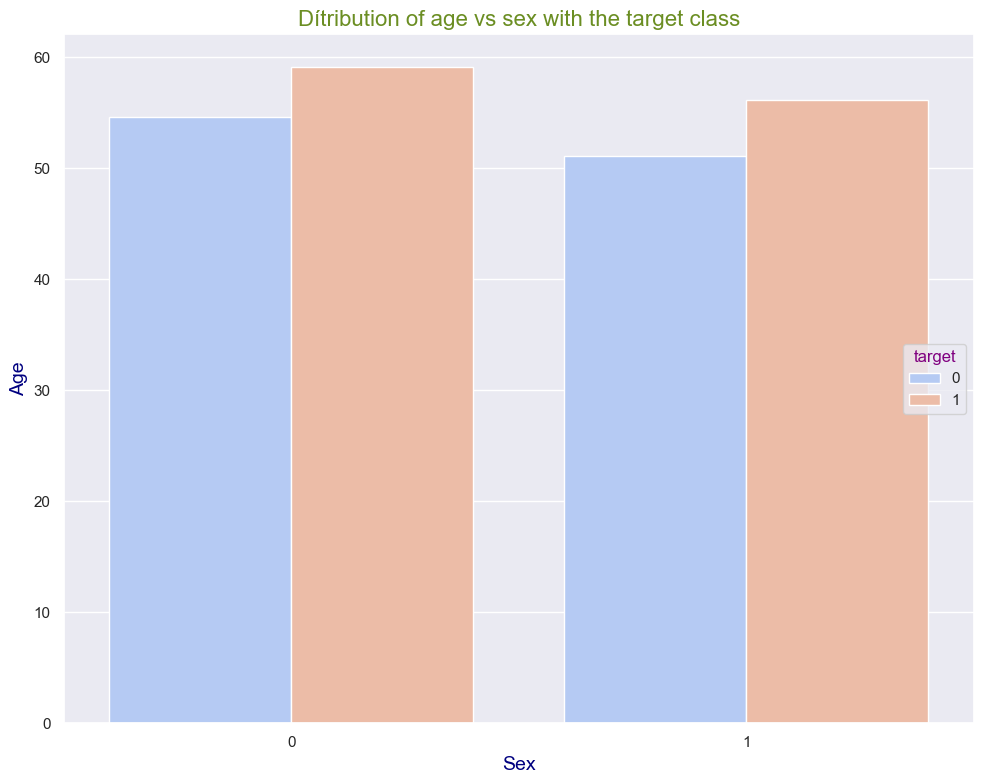

In [46]:
sns.set_theme()
plt.figure(figsize=(10, 8))
sns.barplot(x='sex', y='age', hue='target',
            data=df, palette='coolwarm', ci=None)
plt.title('Dítribution of age vs sex with the target class', fontsize=16, color='olivedrab')
plt.xlabel('Sex', fontsize=14, color='navy')
plt.ylabel('Age', fontsize=14, color='navy')
legend = plt.legend(title='target', loc='center right')
plt.setp(legend.get_title(), color='purple')
plt.tight_layout()
plt.show()

bai tap 3

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier, 
from sklearn.metrics import confusion_matrix
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values  
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [50]:
knn = KNeighborsClassifier(n_neighbors=5,
                           weights='uniform',
                           algorithm='auto',
                           leaf_size=30,
                           p=2,
                           metric='minkowski')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [53]:
# Calculate confusion matrix for training and test sets
cm_train = confusion_matrix(y_train, knn.predict(X_train))
cm_test = confusion_matrix(y_test, knn.predict(X_test))

# Calculate accuracy for training set
accuracy_for_train = np.round(
    (cm_train[0][0] + cm_train[1][1]) / len(y_train), 2)

# Calculate accuracy for test set
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1]) / len(y_test), 2)

# Print accuracies
print()
print('Accuracy for training set for KNeighborsClassifier = {}'.format(
    accuracy_for_train))
print('Accuracy for test set for KNeighborsClassifier = {}'.format(accuracy_for_test))


Accuracy for training set for KNeighborsClassifier = 0.76
Accuracy for test set for KNeighborsClassifier = 0.69


Bai tap 4

In [56]:
from sklearn.svm import SVC
svm_model = SVC(kernel='rbf', random_state=42)

svm_model.fit(X_train, y_train)

SVC(random_state=42)

In [57]:
# Calculate confusion matrix for training and test sets
cm_train = confusion_matrix(y_train, svm_model.predict(X_train))
cm_test = confusion_matrix(y_test, svm_model.predict(X_test))

# Calculate accuracy for training set
accuracy_for_train = np.round(
    (cm_train[0][0] + cm_train[1][1]) / len(y_train), 2)

# Calculate accuracy for test set
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1]) / len(y_test), 2)

# Print accuracies
print()
print('Accuracy for training set for SVM = {}'.format(
    accuracy_for_train))
print('Accuracy for test set for SVM = {}'.format(accuracy_for_test))


Accuracy for training set for SVM = 0.66
Accuracy for test set for SVM = 0.67


Bai tap 5

In [61]:
from sklearn.naive_bayes import GaussianNB
gaussianNB = GaussianNB()
gaussianNB.fit(X_train, y_train)

GaussianNB()

In [62]:
# Calculate confusion matrix for training and test sets
cm_train = confusion_matrix(y_train, gaussianNB.predict(X_train))
cm_test = confusion_matrix(y_test, gaussianNB.predict(X_test))

# Calculate accuracy for training set
accuracy_for_train = np.round(
    (cm_train[0][0] + cm_train[1][1]) / len(y_train), 2)

# Calculate accuracy for test set
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1]) / len(y_test), 2)

# Print accuracies
print()
print('Accuracy for training set for Naive Bayes = {}'.format(
    accuracy_for_train))
print('Accuracy for test set for Naive Bayes = {}'.format(accuracy_for_test))


Accuracy for training set for Naive Bayes = 0.85
Accuracy for test set for Naive Bayes = 0.84


In [63]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion='gini', max_depth=10, min_samples_split=2, random_state=42)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, random_state=42)

In [64]:
# Calculate confusion matrix for training and test sets
cm_train = confusion_matrix(y_train, dt.predict(X_train))
cm_test = confusion_matrix(y_test, dt.predict(X_test))

# Calculate accuracy for training set
accuracy_for_train = np.round(
    (cm_train[0][0] + cm_train[1][1]) / len(y_train), 2)

# Calculate accuracy for test set
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1]) / len(y_test), 2)

# Print accuracies
print()
print('Accuracy for training set for Decision Tree = {}'.format(
    accuracy_for_train))
print('Accuracy for test set for Decison Tree = {}'.format(accuracy_for_test))


Accuracy for training set for Decision Tree = 1.0
Accuracy for test set for Decison Tree = 0.75


In [66]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(criterion='gini', max_depth=10, min_samples_split=2, n_estimators=10, random_state=42)

rf_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, n_estimators=10, random_state=42)

In [68]:
# Calculate confusion matrix for training and test sets
cm_train = confusion_matrix(y_train, rf_model.predict(X_train))
cm_test = confusion_matrix(y_test, rf_model.predict(X_test))

# Calculate accuracy for training set
accuracy_for_train = np.round(
    (cm_train[0][0] + cm_train[1][1]) / len(y_train), 2)

# Calculate accuracy for test set
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1]) / len(y_test), 2)

# Print accuracies
print()
print('Accuracy for training set for Random Forest = {}'.format(
    accuracy_for_train))
print('Accuracy for test set for Random Forest = {}'.format(accuracy_for_test))


Accuracy for training set for Random Forest = 0.98
Accuracy for test set for Random Forest = 0.8


In [69]:
from sklearn.ensemble import AdaBoostClassifier
ada_model = AdaBoostClassifier(n_estimators=50, learning_rate=1.0, random_state=42)
ada_model.fit(X_train, y_train)

c:\Users\dphng\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(random_state=42)

In [71]:
# Calculate confusion matrix for training and test sets
cm_train = confusion_matrix(y_train, ada_model.predict(X_train))
cm_test = confusion_matrix(y_test, ada_model.predict(X_test))

# Calculate accuracy for training set
accuracy_for_train = np.round(
    (cm_train[0][0] + cm_train[1][1]) / len(y_train), 2)

# Calculate accuracy for test set
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1]) / len(y_test), 2)

# Print accuracies
print()
print('Accuracy for training set for AdaBoost = {}'.format(
    accuracy_for_train))
print('Accuracy for test set for AdaBoost = {}'.format(accuracy_for_test))


Accuracy for training set for AdaBoost = 0.91
Accuracy for test set for AdaBoost = 0.84


In [73]:
from sklearn.ensemble import GradientBoostingClassifier
gb_model = GradientBoostingClassifier(learning_rate=0.1, n_estimators=100,
                                      subsample=1.0, min_samples_split=2,
                                      max_depth=3, random_state=42)
gb_model.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [74]:
cm_train = confusion_matrix(y_train, gb_model.predict(X_train))
cm_test = confusion_matrix(y_test, gb_model.predict(X_test))
accuracy_for_train = np.round(
    (cm_train[0][0] + cm_train[1][1]) / len(y_train), 2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1]) / len(y_test), 2)
print()
print('Accuracy for training set for Gradient Boost = {}'.format(
    accuracy_for_train))
print('Accuracy for test set for Gradient Boost = {}'.format(accuracy_for_test))


Accuracy for training set for Gradient Boost = 1.0
Accuracy for test set for Gradient Boost = 0.85


In [102]:
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

xgb_model = XGBClassifier(objective="binary:logistic", random_state=42, n_estimators=100)
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [101]:
cm_train = confusion_matrix(y_train, xgb_model.predict(X_train))
cm_test = confusion_matrix(y_test, xgb_model.predict(X_test))
accuracy_for_train = np.round(
    (cm_train[0][0] + cm_train[1][1]) / len(y_train), 2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1]) / len(y_test), 2)
print()
print('Accuracy for training set for XGBoost = {}'.format(
    accuracy_for_train))
print('Accuracy for test set for XGBoost = {}'.format(accuracy_for_test))


Accuracy for training set for XGBoost = 1.0
Accuracy for test set for XGBoost = 0.87


In [108]:
dtc = DecisionTreeClassifier(random_state=42)
rfc = RandomForestClassifier(random_state=42)
knn = KNeighborsClassifier(
    n_neighbors=5,
    weights='uniform',
    algorithm='auto',
    leaf_size=30,
    p=2,
    metric='minkowski'
)
gc = GradientBoostingClassifier(random_state=42)
svc = SVC(kernel='rbf', probability=True, random_state=42)
ad = AdaBoostClassifier(random_state=42)

# your code here ********************

# Create a list of estimators for stacking (excluding 'xgb' as per your code)
estimators = [
    ('dtc', dtc),
    ('rfc', rfc),
    ('knn', knn),
    ('gc', gc),
    ('ad', ad),
    ('svc', svc),
]

# Define the stacking classifier using XGBoost as the final estimator with specified parameters
stacking_clf = StackingClassifier(
    estimators=estimators,
    final_estimator=XGBClassifier(
        objective="binary:logistic",
        random_state=42,
        n_estimators=100
    ),
    cv=5,
)

# Fit the stacking classifier on the training data
stacking_clf.fit(X_train, y_train)

# Make predictions on the training and test sets
y_train_pred = stacking_clf.predict(X_train)
y_test_pred = stacking_clf.predict(X_test)

# Compute the confusion matrices for training and test sets
cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)

print()
accuracy_for_train = np.round(
    (cm_train[0][0] + cm_train[1][1]) / len(y_train), 2
)
accuracy_for_test = np.round(
    (cm_test[0][0] + cm_test[1][1]) / len(y_test), 2
)
print('Accuracy for training set for Stacking = {}'.format(accuracy_for_train))
print('Accuracy for test set for Stacking = {}'.format(accuracy_for_test))

c:\Users\dphng\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\dphng\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\dphng\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\dphng\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is 


Accuracy for training set for Stacking = 0.95
Accuracy for test set for Stacking = 0.87
